In [1]:
import boto3
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

### data

In [2]:
client = boto3.client('s3')

In [3]:
s3_prefix = 's3://'
bucket = 'sisyphus-general-bucket'
primary_folder = 'AthenaInsights'

In [4]:
# response = client.list_objects_v2(
#     Bucket=bucket,
#     Prefix=f'{primary_folder}/data/data_prep/')

# paths = []
# for content in response.get('Contents', []):
#     # print(f"{s3_prefix}{bucket}/{content['Key']}")
#     paths.append(f"{s3_prefix}{bucket}/{content['Key']}")
# [z for z in paths if '1m' in z]

In [8]:
# spy_1m_df_loc = f'{s3_prefix}{bucket}/{primary_folder}/data/data_prep/stock_bars_1min.parquet'
spy_1m_df_loc = 's3://sisyphus-general-bucket/AthenaInsights/data/feature_prep/stock_bars_1min.parquet'
spy_1m_df = pd.read_parquet(spy_1m_df_loc)
spy_1m_df = spy_1m_df[spy_1m_df.symbol=='SPY']

In [9]:
spy_1m_df.shape, spy_1m_df.columns

((1002602, 91),
 Index(['symbol', 'timestamp', 'open', 'high', 'low', 'close', 'volume',
        'trade_count', 'vwap', 'us_eastern_date', 'market_open', 'open_ema_2m',
        'open_sma_2m', 'high_ema_2m', 'high_sma_2m', 'low_ema_2m', 'low_sma_2m',
        'close_ema_2m', 'close_sma_2m', 'volume_ema_2m', 'volume_sma_2m',
        'open_ema_3m', 'open_sma_3m', 'high_ema_3m', 'high_sma_3m',
        'low_ema_3m', 'low_sma_3m', 'close_ema_3m', 'close_sma_3m',
        'volume_ema_3m', 'volume_sma_3m', 'open_ema_5m', 'open_sma_5m',
        'high_ema_5m', 'high_sma_5m', 'low_ema_5m', 'low_sma_5m',
        'close_ema_5m', 'close_sma_5m', 'volume_ema_5m', 'volume_sma_5m',
        'open_ema_8m', 'open_sma_8m', 'high_ema_8m', 'high_sma_8m',
        'low_ema_8m', 'low_sma_8m', 'close_ema_8m', 'close_sma_8m',
        'volume_ema_8m', 'volume_sma_8m', 'open_ema_12m', 'open_sma_12m',
        'high_ema_12m', 'high_sma_12m', 'low_ema_12m', 'low_sma_12m',
        'close_ema_12m', 'close_sma_12m', 'volum

In [10]:
spy_1m_df.head()

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap,us_eastern_date,...,open_ema_26m,open_sma_26m,high_ema_26m,high_sma_26m,low_ema_26m,low_sma_26m,close_ema_26m,close_sma_26m,volume_ema_26m,volume_sma_26m
us_eastern_timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-31 19:01:00,SPY,2020-01-01 00:01:00+00:00,322.36,322.36,322.36,322.36,1073.0,23.0,322.36,2019-12-31,...,322.360000,NaN,322.360000,NaN,322.360000,NaN,322.360000,NaN,1073.000000,NaN
2019-12-31 19:11:00,SPY,2020-01-01 00:11:00+00:00,322.38,322.38,322.38,322.38,300.0,6.0,322.38,2019-12-31,...,322.361481,NaN,322.361481,NaN,322.361481,NaN,322.361481,NaN,1015.740741,NaN
2019-12-31 19:12:00,SPY,2020-01-01 00:12:00+00:00,322.38,322.38,322.38,322.38,2400.0,16.0,322.38,2019-12-31,...,322.362853,NaN,322.362853,NaN,322.362853,NaN,322.362853,NaN,1118.278464,NaN
2019-12-31 19:14:00,SPY,2020-01-01 00:14:00+00:00,322.35,322.35,322.35,322.35,200.0,1.0,322.35,2019-12-31,...,322.361901,NaN,322.361901,NaN,322.361901,NaN,322.361901,NaN,1050.257837,NaN
2019-12-31 19:18:00,SPY,2020-01-01 00:18:00+00:00,322.38,322.38,322.38,322.38,1910.0,28.0,322.38,2019-12-31,...,322.363242,NaN,322.363242,NaN,322.363242,NaN,322.363242,NaN,1113.942441,NaN


In [11]:
# Check if the Datetime index is sorted
if spy_1m_df.index.is_monotonic_increasing:
    print("The index is sorted.")
else:
    print("The index is not sorted. Sorting now.")
    spy_1m_df.sort_index(inplace=True)


The index is sorted.


In [12]:
# Define the percentage threshold for categorizing reversals
threshold_percentage = 0.03 / 100  # converting percentage to a decimal

# Function to calculate rolling highs and lows
def calculate_rolling_window(df, window=30):
    rolling_high = df['high'].rolling(window=window, min_periods=1).max().shift(-window)
    rolling_low = df['low'].rolling(window=window, min_periods=1).min().shift(-window)
    return rolling_high, rolling_low

# Calculate rolling highs and lows for the next 30 minutes
spy_1m_df['future_high'], spy_1m_df['future_low'] = calculate_rolling_window(spy_1m_df)

# Function to determine category based on thresholds
def categorize_reversals(row):
    current_close = row['close']
    future_high = row['future_high']
    future_low = row['future_low']

    # Check for upward reversal
    if future_high >= current_close * (1 + threshold_percentage):
        return 'A'  # Potential Upward Reversal
    # Check for downward reversal
    elif future_low <= current_close * (1 - threshold_percentage):
        return 'B'  # Potential Downward Reversal
    else:
        return 'C'  # Undecided

# Apply categorization to each row
spy_1m_df['category'] = spy_1m_df.apply(categorize_reversals, axis=1)


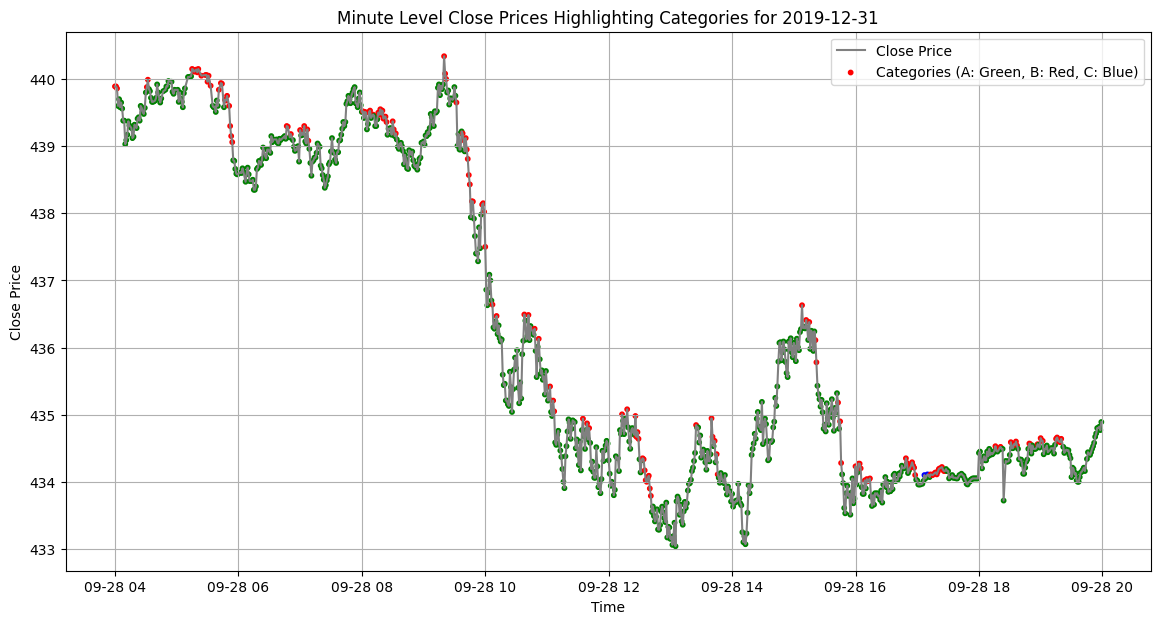

In [13]:
import matplotlib.pyplot as plt

# Filter the dataframe for a specific day, e.g., 2019-12-31
specific_day_df = spy_1m_df.loc['2021-09-28']

# Prepare colors based on categories
colors = specific_day_df['category'].map({'A': 'green', 'B': 'red', 'C': 'blue'})

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(specific_day_df.index, specific_day_df['close'], label='Close Price', color='gray')
plt.scatter(specific_day_df.index, specific_day_df['close'], color=colors, s=10, label='Categories (A: Green, B: Red, C: Blue)')
plt.title('Minute Level Close Prices Highlighting Categories for 2019-12-31')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


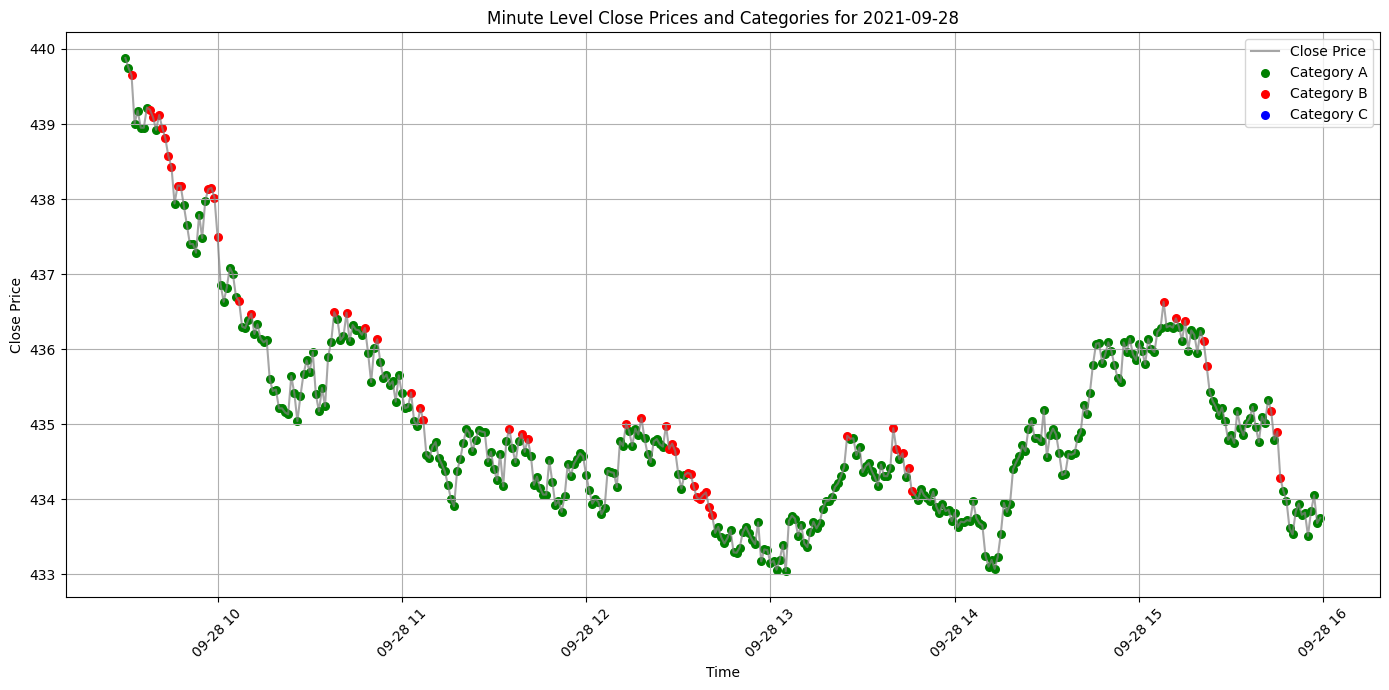

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'spy_1m_df' is already loaded and processed with the 'category' column added
# Filter for a specific day and only when the market is open
date_to_plot = '2021-09-28'
daily_data = spy_1m_df[(spy_1m_df.index.date == pd.to_datetime(date_to_plot).date()) & (spy_1m_df['market_open'] == 1)]

# Plotting the close prices for the day
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['close'], label='Close Price', color='gray', alpha=0.7)

# Highlight categories
for category, color in zip(['A', 'B', 'C'], ['green', 'red', 'blue']):
    cat_data = daily_data[daily_data['category'] == category]
    plt.scatter(cat_data.index, cat_data['close'], color=color, label=f'Category {category}', s=30)  # s is the marker size

plt.title(f'Minute Level Close Prices and Categories for {date_to_plot}')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
', '.join([z for z in spy_1m_df.columns if 'close' in z])

'close, close_ema_2m, close_sma_2m, close_ema_3m, close_sma_3m, close_ema_5m, close_sma_5m, close_ema_8m, close_sma_8m, close_ema_12m, close_sma_12m, close_ema_10m, close_sma_10m, close_ema_20m, close_sma_20m, close_ema_26m, close_sma_26m'

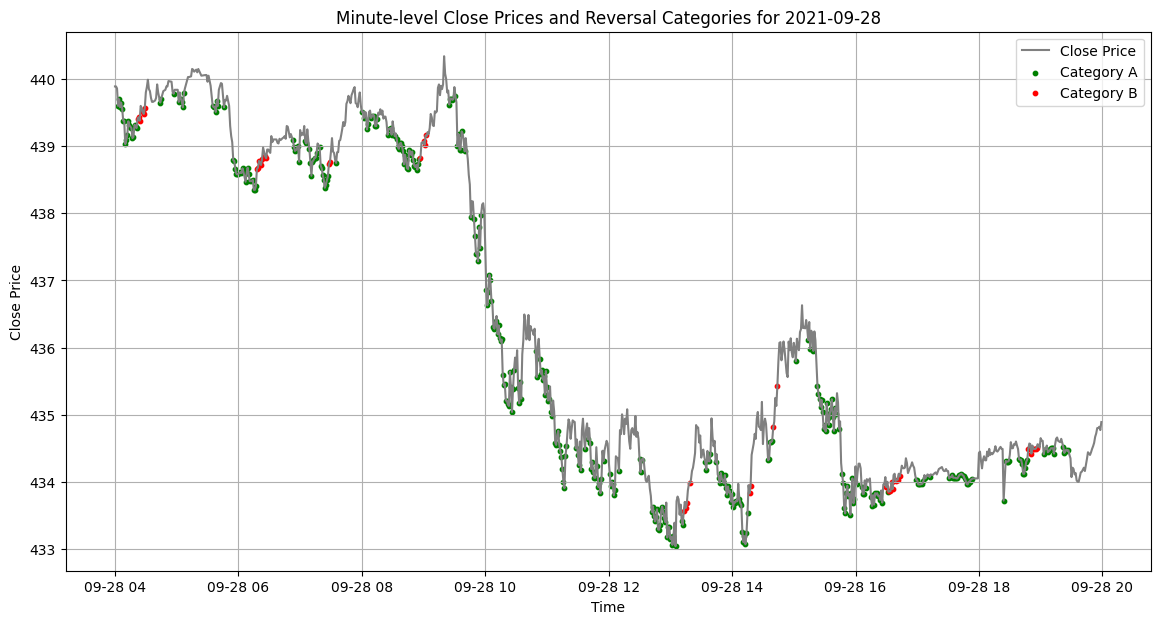

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data load (ensure your 'spy_1m_df' is already loaded with this kind of structure)
# spy_1m_df = pd.read_csv('data.csv', parse_dates=['us_eastern_timestamp'], index_col='us_eastern_timestamp')

# Select a specific day's data
date_to_analyze = '2021-09-28'
daily_data = spy_1m_df.loc[date_to_analyze]

# Calculate the Simple Moving Average (SMA) for the 20-minute window
# daily_data['20_min_sma'] = daily_data['Close'].rolling(window=20).mean()

# Determine the trend for Category A and B conditions
daily_data['trend_A'] = daily_data['close'] < daily_data['close_sma_20m']  # True if downtrend
daily_data['trend_B'] = daily_data['close'] > daily_data['close_sma_20m']  # True if uptrend

# Calculate potential high and low in the next 30 minutes
daily_data['future_high'] = daily_data['high'].rolling(window=30, min_periods=1).max().shift(-30)
daily_data['future_low'] = daily_data['low'].rolling(window=30, min_periods=1).min().shift(-30)

# Define the reversal thresholds
threshold = 0.0003  # 0.03%
daily_data['close_future_high_diff'] = (daily_data['future_high'] - daily_data['close']) / daily_data['close']
daily_data['close_future_low_diff'] = (daily_data['future_low'] - daily_data['close']) / daily_data['close']

# Identify Category A and B conditions
daily_data['category'] = np.where(
    (daily_data['trend_A'] & (daily_data['close_future_high_diff'] > threshold)), 'A',
    np.where(
        (daily_data['trend_B'] & (daily_data['close_future_low_diff'] > -threshold)), 'B',
        'C'
    )
)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['close'], label='Close Price', color='gray')

# Highlight categories
for category in ['A', 'B']:
    indices = daily_data[daily_data['category'] == category].index
    colors = {'A': 'green', 'B': 'red'}
    plt.scatter(indices, daily_data.loc[indices, 'close'], color=colors[category], label=f'Category {category}', s=10)

plt.title(f'Minute-level Close Prices and Reversal Categories for {date_to_analyze}')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


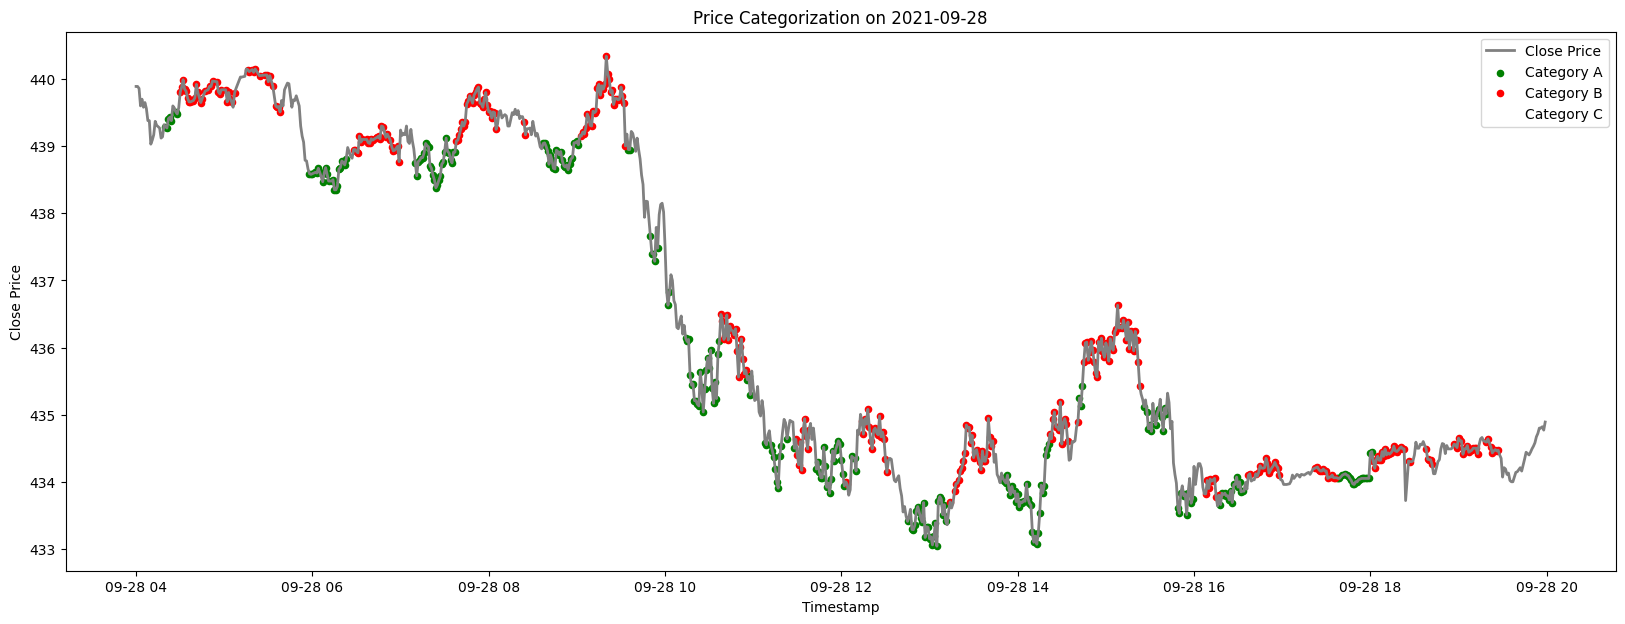

In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def calculate_trend_slope(df, window=20, field='close'):
    """ Calculate the slope of the linear regression line for the last 'window' minutes """
    reg = LinearRegression()
    # Indices for X, close prices for Y
    x = np.array(range(window)).reshape(-1, 1)
    y = df[field].values.reshape(-1, 1)
    reg.fit(x, y)
    # Slope of the regression line
    return reg.coef_[0][0]

def categorize_points(df, slope_threshold=0.1, high_low_threshold=0.3, field='close'):
    """ Categorize each minute data point into A, B, or C """
    categories = []
    for i in range(len(df)):
        if i < 20 or i > len(df) - 31:  # Not enough data to categorize
            categories.append('C')  # Consider as undecided for now
            continue
        
        # Calculate the trend over the past 20 minutes
        past_trend_slope = calculate_trend_slope(df.iloc[i-20:i], field=field)
        
        # Get the current close price and high/low over the next 30 minutes
        current_close = df.iloc[i]['close']
        future_high = df.iloc[i+1:i+31]['high'].max()
        future_low = df.iloc[i+1:i+31]['low'].min()
        
        # Calculate thresholds
        high_threshold = current_close * (1 + high_low_threshold) # 1.0003 # 
        low_threshold = current_close * 0.9997 # (1 - high_low_threshold)
        
        # Determine the category based on the criteria
        if past_trend_slope < (-1*slope_threshold) and future_high > high_threshold: # 
            # print('A', past_trend_slope)
            categories.append('A')
        elif past_trend_slope > (slope_threshold) and future_low < low_threshold: # 
            # print('B', past_trend_slope)
            categories.append('B')
        else:
            # print('C', past_trend_slope)
            categories.append('C')
    
    return categories

def plot_categorization(df, date, slope_threshold=0.1, high_low_threshold=0.3):
    """ Plot categorization for a given day """
    df_day = df.loc[date]
    categories = categorize_points(df_day, slope_threshold, high_low_threshold, field='close_ema_5m')
    df_day['category'] = categories
    
    plt.figure(figsize=(20, 7))
    # df_day.to_csv('df_day.csv')
    plt.plot(df_day.index, df_day['close'], label='Close Price', color='gray', linewidth=2)
    for cat, color in zip(['A', 'B', 'C'], ['green', 'red', 'gray']):
        plt.scatter(df_day[df_day['category'] == cat].index, df_day[df_day['category'] == cat]['close'], color=color, label=f'Category {cat}', s=20 if cat!='C' else 0)
    # plt.plot(df_day.index, df_day['close_ema_3m'], label='Close Price', color='blue', )
    plt.legend()
    plt.title(f'Price Categorization on {date}')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price')
    # plt.xticks (df_day.index[::20].strftime('%H-%M'), rotation=90)
    plt.show()

# Assuming 'spy_1m_df' is already loaded and indexed properly with datetime
plot_categorization(spy_1m_df, '2021-09-28', slope_threshold=0, high_low_threshold=0.001)

In [206]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def calculate_trend_slope(df, window=20, field='close'):
    """ Calculate the slope of the linear regression line for the last 'window' minutes based on a specified field """
    reg = LinearRegression()
    # Indices for X, specified field values for Y
    x = np.array(range(window)).reshape(-1, 1)
    y = df[field].values.reshape(-1, 1)
    reg.fit(x, y)
    # Slope of the regression line
    return reg.coef_[0][0]

def categorize_points(df, field='close', prev_data_points=20, positive_slope_threshold=0.0, negative_slope_threshold=0.0, positive_rise_threshold=0.0003, negative_drop_threshold=0.0003, positive_future_window=30, negative_future_window=30):
    """ Categorize each minute data point into A, B, or C with dynamic thresholds and fields """
    categories = []
    for i in range(len(df)):
        if i < prev_data_points or i > len(df) - max(positive_future_window, negative_future_window):  # Not enough data to categorize
            categories.append('C')  # Consider as undecided for now
            continue
        
        # Calculate the trend over the past 20 minutes using the specified field
        past_trend_slope = calculate_trend_slope(df.iloc[i-prev_data_points:i], window=prev_data_points,field=field)
        
        # Get the current price and future high/low based on the specified field
        current_price = df.iloc[i][field]
        future_high = df.iloc[i+1:i+1+positive_future_window][field].max()
        future_low = df.iloc[i+1:i+1+negative_future_window][field].min()
        
        # Calculate thresholds based on current price
        high_threshold = current_price * (1 + positive_rise_threshold)
        low_threshold = current_price * (1 - negative_drop_threshold)
        
        # Determine the category based on the criteria and trend
        if past_trend_slope < negative_slope_threshold and future_high > high_threshold:
            categories.append('A')
        elif past_trend_slope > positive_slope_threshold and future_low < low_threshold:
            categories.append('B')
        else:
            categories.append('C')
    
    return categories

def plot_categorization(df, date, field='close', **kwargs):
    """ Plot categorization for a given day with dynamic field selection """
    df_day = df.loc[date]
    categories = categorize_points(df_day, field=field, **kwargs)
    df_day['category'] = categories
    
    plt.figure(figsize=(14, 7))
    plt.plot(df_day.index, df_day[field], label=f'{field.capitalize()} Price', color='gray', linewidth=2)
    # plt.plot(df_day.index, df_day['close'], label=f'{field.capitalize()} Price', color='blue', linewidth=1)
    for cat, color in zip(['A', 'B', 'C'], ['green', 'red', 'gray']):
        plt.scatter(df_day[df_day['category'] == cat].index, df_day[df_day['category'] == cat][field], color=color, label=f'Category {cat}', s=20 if cat!='C' else 0)
    plt.legend()
    plt.title(f'Price Categorization on {date}')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{field.capitalize()} Price')
    plt.show()

2023-06-15


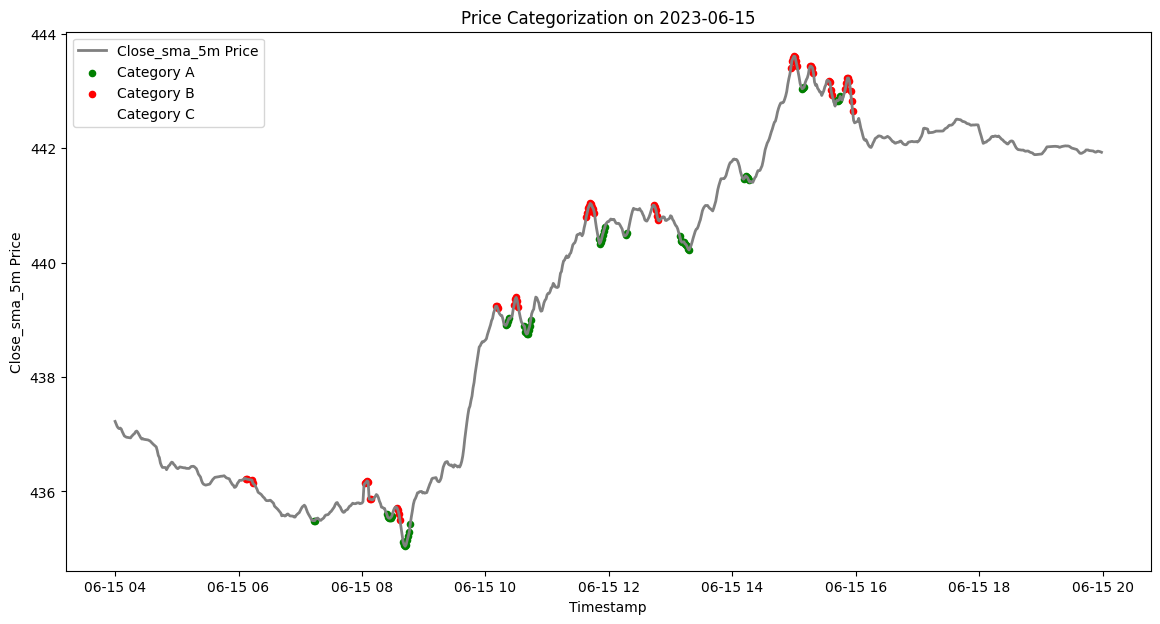

In [239]:
# # Example usage with customizable options:
# plot_categorization(spy_1m_df, '2021-09-28', field='close_sma_5m', 
#                     # prev_data_points=9,
#                     prev_data_points=11,
#                     positive_slope_threshold=0.013, negative_slope_threshold=-0.026, 
#                     positive_rise_threshold=0.0007, negative_drop_threshold=0.001, 
#                     positive_future_window=30, negative_future_window=30)

# Example usage with customizable options:
# plot_categorization(spy_1m_df, '2022-02-25', field='close_sma_5m', 
#                     # prev_data_points=9,
#                     prev_data_points=11,
#                     positive_slope_threshold=0.013, negative_slope_threshold=-0.026, 
#                     positive_rise_threshold=0.0007, negative_drop_threshold=0.002, 
#                     positive_future_window=30, negative_future_window=30)

# plot_categorization(spy_1m_df, '2021-09-28', field='close_sma_5m', 
#                     # prev_data_points=9,
#                     prev_data_points=11,
#                     positive_slope_threshold=0.013, negative_slope_threshold=-0.026, 
#                     positive_rise_threshold=0.0007, negative_drop_threshold=0.001, 
#                     positive_future_window=30, negative_future_window=30)

start_date = '2020-01-01'
end_date = '2024-11-11'
business_days = pd.bdate_range(start=start_date, end=end_date)
date_filter = pd.Timestamp(np.random.choice(business_days)).strftime('%Y-%m-%d')
print(date_filter)
# date_filter = '2022-04-11'
plot_categorization(spy_1m_df, date_filter, field='close_sma_5m', 
                    # prev_data_points=9,
                    prev_data_points=11,
                    positive_slope_threshold=0.013, negative_slope_threshold=-0.026, 
                    positive_rise_threshold=0.0007, negative_drop_threshold=0.001, 
                    positive_future_window=30, negative_future_window=30)


In [233]:
date_filter

'2023-10-02'